In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [7]:
# Provide the full path to the files
train_path = r'C:\Users\Admin\Downloads\twitter_training.csv'
val_path = r'c:\Users\Admin\Downloads\twitter_validation.csv'

# Load datasets without headers
train_df = pd.read_csv(train_path, header=None)
val_df = pd.read_csv(val_path, header=None)


In [9]:
# Define proper column names
columns = ['id', 'topic', 'sentiment', 'text']

# Assign to dataframes
train_df.columns = columns
val_df.columns = columns

# Combine train and validation data
df = pd.concat([train_df, val_df], ignore_index=True)


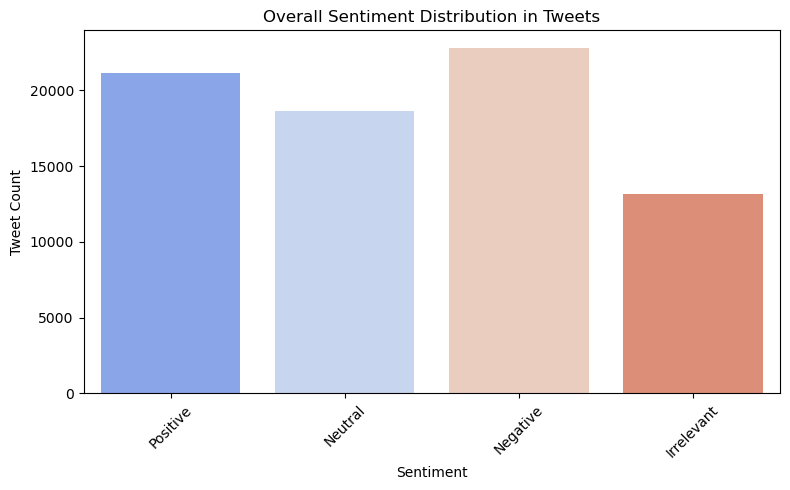

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', legend=False)
plt.title("Overall Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

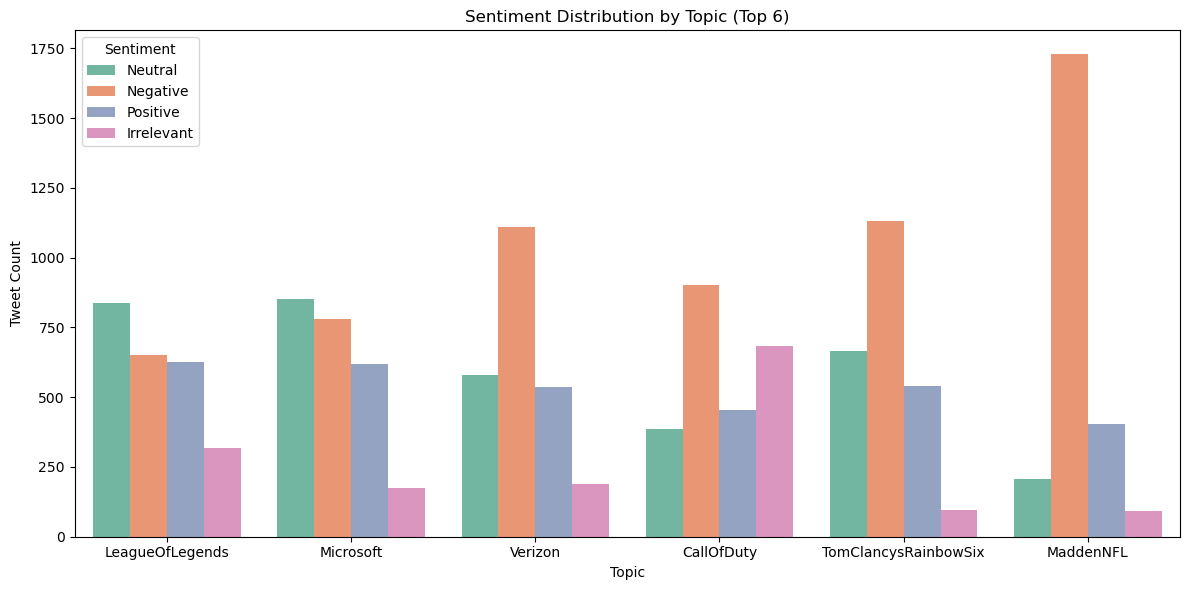

In [13]:
# Select top 6 most common topics
top_topics = df['topic'].value_counts().nlargest(6).index
df_top = df[df['topic'].isin(top_topics)]

# Plot sentiment counts for each top topic
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='topic', hue='sentiment', palette='Set2')
plt.title("Sentiment Distribution by Topic (Top 6)")
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


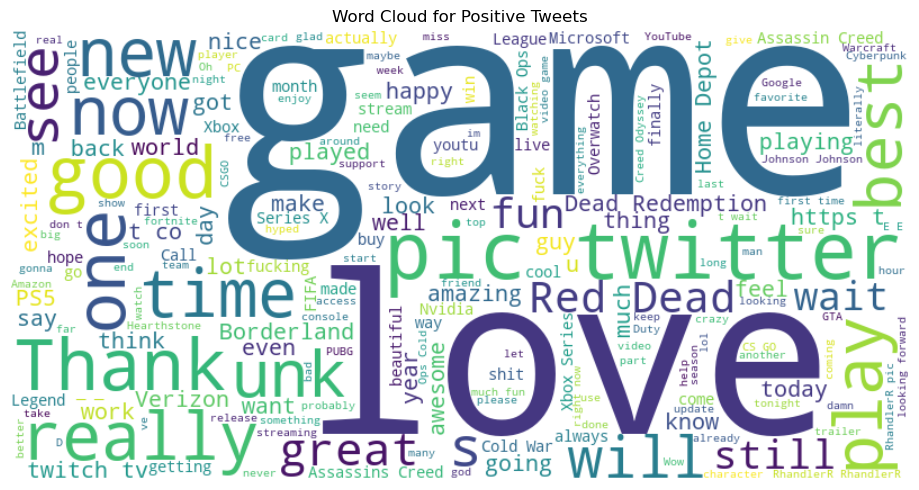

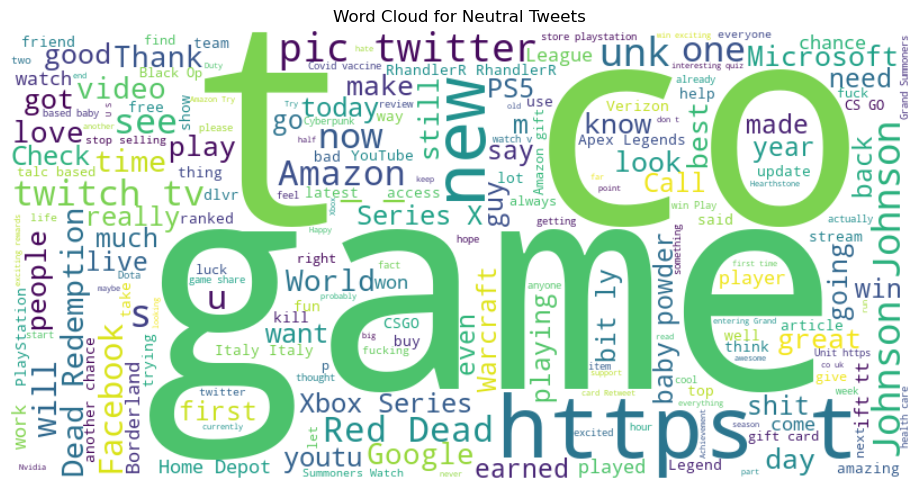

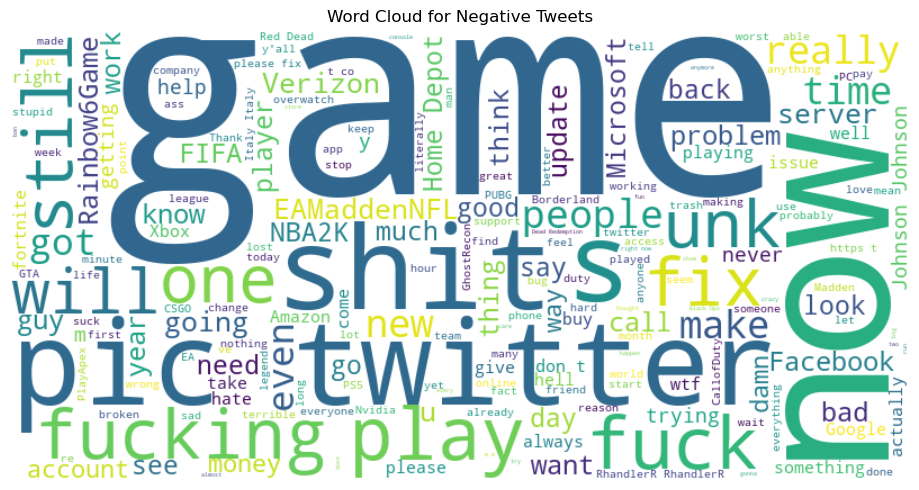

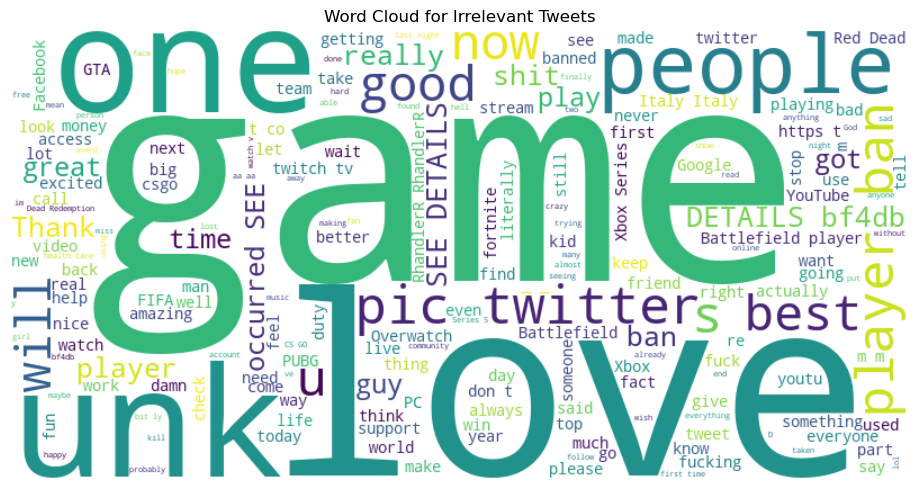

In [15]:
sentiments = df['sentiment'].unique()

for sentiment in sentiments:
    # Join all tweet text for current sentiment
    text = ' '.join(df[df['sentiment'] == sentiment]['text'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
